In [1]:
import pandas as pd
insurance_data=pd.read_csv('insurance.csv')

In [2]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
import tensorflow as tf
insurance_data=pd.get_dummies(insurance_data)

In [4]:
insurance_data.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [5]:
insurance_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [6]:
insurance_data.shape

(1338, 12)

In [7]:
X=insurance_data.drop('charges',axis=1)
y=insurance_data['charges']
X.shape,y.shape

((1338, 11), (1338,))

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
# X_train.head(10)

In [10]:
tf.random.set_seed(42)
# create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# train the model
history=model.fit(X_train,y_train,epochs=300)

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13346.0371 - mae: 13346.0371 
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13338.6338 - mae: 13338.6338 
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13284.9570 - mae: 13284.9570 
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12923.7031 - mae: 12923.7031 
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11210.5439 - mae: 11210.5439 
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7920.5327 - mae: 7920.5327 
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7409.2197 - mae: 7409.2197 
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7375.7349 - mae: 7375.7349 
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7346.2383 - mae: 7346.2383 
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7316.1567 - mae: 7316.1567 
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7286.6797 - mae: 7286.6797 
Epoch 12/300
34/34 ━━━━━━━━━━━━

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,825 (22.76 KB)

 Trainable params: 1,941 (7.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,884 (15.18 KB)

In [12]:
y_pred=model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_17352\594470589.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


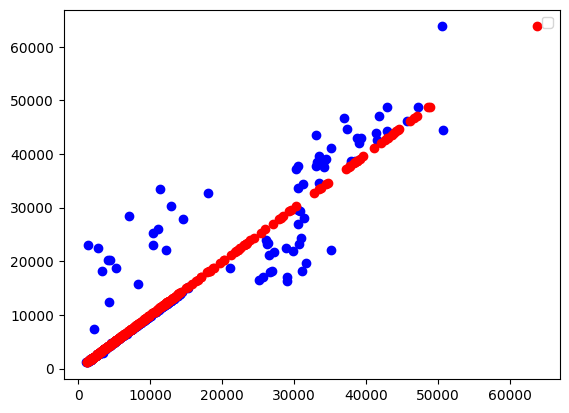

In [13]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test,c='b')
plt.scatter(y_test,y_test,c='r')
plt.legend();
# plt.show()

In [14]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2137.8999 - mae: 2137.8999  


[2137.89990234375, 2137.89990234375]

<Axes: >

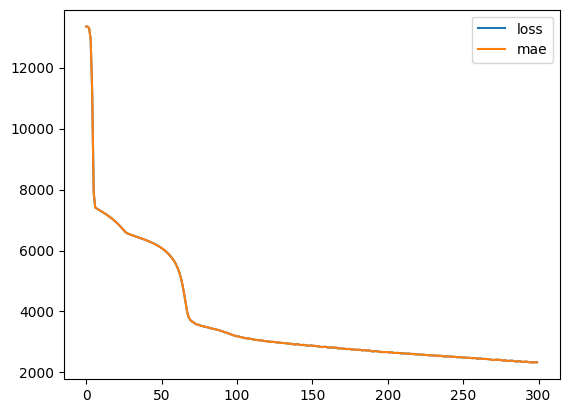

In [15]:
pd.DataFrame(history.history).plot()

<Axes: >

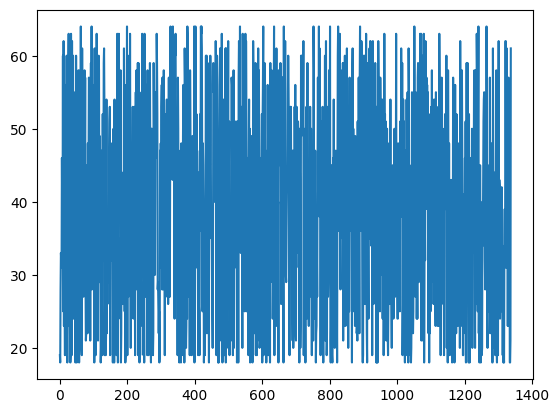

In [17]:
# preprocessing data(normalization and standardization)
X['age'].plot()

In [20]:
X['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance=pd.read_csv('insurance.csv')
# insurance=pd.get_dummies(insurance)

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#  Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

# create X and y
X=insurance.drop('charges',axis=1)
y=insurance['charges']

# Build our train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [28]:
X_test_normal[0],X_train.loc[0]

(array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]),
 age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object)

In [35]:
# X_train.shape,X_train_normal.shape,
X_train.head(1)

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest


In [42]:
tf.random.set_seed(42)
# create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# train the model
history=model.fit(X_train_normal,y_train,epochs=600)

Epoch 1/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13346.0264 - mae: 13346.0264
Epoch 2/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13345.3633 - mae: 13345.3633 
Epoch 3/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13337.1816 - mae: 13337.1816 
Epoch 4/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13249.0293 - mae: 13249.0293 
Epoch 5/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12635.0029 - mae: 12635.0029 
Epoch 6/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10265.0107 - mae: 10265.0107 
Epoch 7/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8023.1860 - mae: 8023.1860 
Epoch 8/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7772.6470 - mae: 7772.6470 
Epoch 9/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7579.7847 - mae: 7579.7847 
Epoch 10/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7381.7222 - mae: 7381.7222 
Epoch 11/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7160.0020 - mae: 7160.0020 
Epoch 12/600
34/34 ━━━━━━━━━━━

<Axes: >

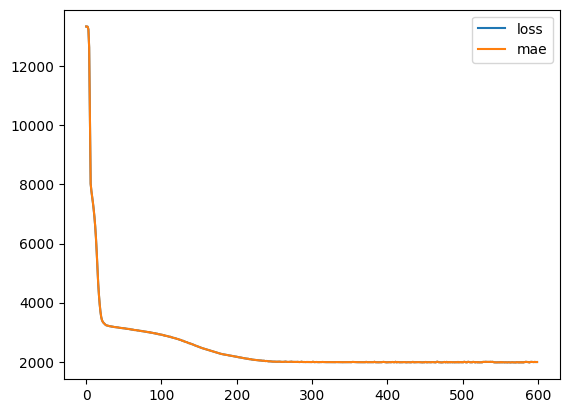

In [43]:
pd.DataFrame(history.history).plot()

In [ ]:
# **TensorBoard - a component of the Tensorflow library
#  to help track modelling experiments

#  Weights & Biases - a tool for tracking all of kinds of machine learning 

# save the model(model.save(model_name)) e.g. .h5, keras
# load the model(tf.keras.models.load_model(model_name))
# download file from google colab
'''from google.colab import files
files.download(file_name)'''

# !cp file_name file_path (where copied)